<a href="https://www.kaggle.com/code/altarnolutarkan/traffic-monster-detection?scriptVersionId=129973570" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
df=pd.read_excel('/kaggle/input/categories/trainedited.xlsx')

X=df['X']
Y=df[['sürücü_hatası','diğer_etkenler','sebep_belirtilmemiş','kural_ihlali']].astype('int')
Y=np.array(Y)

In [3]:
'for lemmitized data'
#df1=pd.read_excel('/kaggle/input/lemmitezed/preproccesed.xlsx')
#X=df1['X']


'for lemmitized data'

In [4]:
Ycat=[]
for i in range(0,len(Y)):
    empty=''
    for j in Y[i]:
        empty=empty+str(j)
    Ycat.append(empty)
Ycat=np.array(Ycat)

In [5]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import pad_sequences
from nltk.tokenize import word_tokenize
import string 

import tensorflow as tf
import seaborn as sns

<AxesSubplot:>

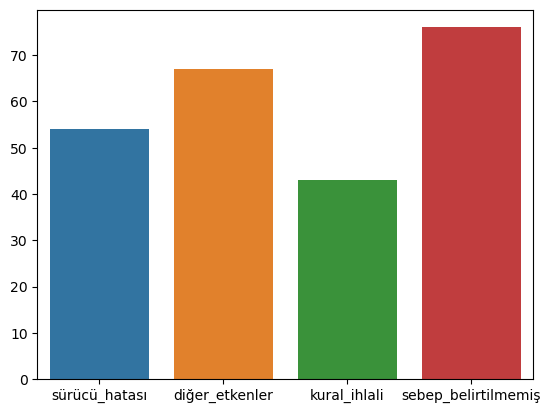

In [6]:
sns.barplot(
    pd.DataFrame({
    'sürücü_hatası': [df[df['sürücü_hatası']==1].count()[0]],
    'diğer_etkenler': [df[df['diğer_etkenler']==1].count()[0]],
    'kural_ihlali':[ df[df['kural_ihlali']==1].count()[0]],
    'sebep_belirtilmemiş':[ df[df['sebep_belirtilmemiş']==1].count()[0]]   
    })
)


In [7]:
with tf.device('/GPU:0'):
    with open('/kaggle/input/glove-turkish/vectors.txt','r') as file:
        embeddings={}
        for line in file:
            embeddings[line.split(' ')[0]] = np.array([float(value) for value in line.split(' ')[1:]])

In [8]:
words = ["acaba","acep","adeta","altmış","altı","ama","ancak","arada","artık","aslında","aynen",
"ayrıca","az","bana","bari","bazen","bazı","başka","belki","ben","benden","beni","benim","beri","beş",
"bey","bile","bin","bir","biraz","biri","birkaç","birkez","birçok","birşeyi","birşey",
"biz","bizden","bize","bizi","bizim","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun",
"burada","böyle","böylece","bütün","da","daha","dahi","dahil","daima","dair","dayanarak","de","defa","deđil","değil",
"diye","diğer","diğer","doksan","dokuz","dolayı","dolayısıyla","dört","edecek","eden","ederek","edilecek","ediliyor",
"edilmesi","ediyor","elli","en","etmesi","etti","ettiği","ettiğini","eder","eğer","fakat","gibi","göre","halbuki",
"halen","hangi","hani","hariç","hatta","hele","hem","henüz","hep","hepsi","her","herhangi","herkes","herkesin","hiç",
"hiçbir","iken","iki","ila","ile","ilgili","ilk","illa","ise","itibaren","itibariyle","iyi","iyice","için","işte",
"kadar","kanımca","karşın","katrilyon","kendi","kendilerine","kendini","kendisi","kendisine","kendisini","kere","kez",
"keşke","ki","kim","kimden","kime","kimi","kimse","kısaca","kırk","lakin","madem","meğer","milyar","milyon",
"mu","mü","mi","mı","nasıl","ne","neden","nedenle","nerde","nere","nerede","nereye","nitekim","niye","niçin",
"o","olan","olarak","oldu","olduklarını","olduğu","olduğunu","olmadı","olmadığı","olmak","olması","olmayan","olmaz",
"olsa","olsun","olup","olur","olursa","oluyor","on","ona","ondan","onlar","onlardan","onları","onların","onları",
"onu","onun","otuz","oysa","pek","rağmen","sadece","sanki","sekiz","seksen","sen","senden","seni","senin","siz","sizden",
"sizi","sizin","sonra","tarafından","trilyon","tüm","var","vardı","ve","veya","veyahut","ya","yahut","yani","yapacak",
"yapmak","yaptı","yaptıkları","yaptığı","yaptığını","yapılan","yapılması","yapıyor","yedi","yerine","yetmiş",
"yine","yirmi","yoksa","yüz","zaten","çok","çünkü","öyle","üzere","üç","beş","şeyden","beri","beyler","bu",
"buna","bunda","bundan","bunu","şey","şeyden","şeyi","şeyler","şu","şuna","şunda","şundan","şunları","şunu","şöyle",
"şayet","şimdi","şu","şöyle"]

words1 = ['fakat','lakin','ancak','acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']

stopwords = words+words1

In [9]:
unwanted=string.punctuation + string.digits

def preprocces(text):
    removed_punc = [c for c in text if c not in unwanted]
    removed_punc=''.join(removed_punc) 
    return removed_punc
X = X.apply(preprocces)

In [10]:
def preprocces2(text):
    corpus=text.split(' ')
    for word in corpus:
        if word.lower() in stopwords:
            corpus.remove(word)
    corpus=' '.join(corpus[:])
    return corpus.lower().strip(' ')
X = X.apply(preprocces2)

In [11]:
def text2glove(text):
    #sent_arr = np.zeros((300,3))
    empty=[]
    for word in text.split(' '):
        if word in embeddings.keys():
            empty.append(embeddings[word])
    return empty

In [12]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Embedding,Bidirectional
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index

In [14]:
X

0      kuzey marmara otoyolunda feci kaza  ölü  yaral...
1      sürücü eyüp taşyuran  i̇zmir bornova ‘da beton...
2      alınan bilgiye kaza sabah saatlerinde siverek ...
3      bodrumun torba mahallesi emin anter bulvarı pa...
4      adanada kamyon polis aracının çarpışması sonuc...
                             ...                        
235    güncelleme tarihi mayıs   olay akşam saatlerin...
236    son güncellenme    süleymanpaşa ilçesi  i̇stan...
237    olay karayolu silivriçorlu yolunda ters yönde ...
238    \n pendikte fevzi çakmak mahallesi mimar sinan...
239    xd\n\t yaşındaki emre akın yönetimindeki otomo...
Name: X, Length: 240, dtype: object

In [15]:
Ycat[Ycat =='1000' ]=0  #[1., 0., 0., 0.] #sürücü hatası
Ycat[Ycat =='0100' ]=1  #[0., 1., 0., 0.] #diğer etkenler
Ycat[Ycat =='0010' ]=2  #[0., 0., 1., 0.] #sebep belirtilmemiş
Ycat[Ycat =='0001' ]=3  #[0., 0., 0., 1.] #kural ihlali

Ycat=Ycat.astype('float')
Ycat

array([2., 0., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2., 1., 2., 2., 2., 2.,
       2., 0., 0., 3., 1., 2., 2., 0., 1., 2., 0., 2., 2., 2., 0., 2., 0.,
       2., 0., 1., 0., 2., 0., 0., 2., 0., 1., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 1., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       0., 2., 2., 2., 0., 2., 0., 0., 0., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 0., 2., 1., 0., 3., 0., 2., 0., 2., 2., 0., 0., 1., 0., 0.,
       2., 3., 0., 2., 3., 0., 0., 2., 2., 2., 2., 2., 0., 2., 1., 1., 0.,
       1., 2., 2., 1., 2., 2., 1., 0., 3., 0., 2., 0., 2., 2., 0., 3., 3.,
       0., 1., 1., 3., 3., 0., 1., 3., 3., 1., 1., 1., 0., 1., 1., 1., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [16]:
y = to_categorical(Ycat)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
Xtokens_train = tokenizer.texts_to_sequences(X_train)


In [19]:
def getmaxlen(data):
    maxlen=0
    for i in data:
        maxlen = max(maxlen,len(word_tokenize(i)))
    return maxlen
    
maxlen=getmaxlen(X)
maxlen

451

In [20]:
Xtokens_train = pad_sequences(Xtokens_train,maxlen=maxlen,padding='post',truncating='post')
Xtokens_train

array([[   3, 4094,  989, ...,    0,    0,    0],
       [1182,  367,  321, ...,    0,    0,    0],
       [2444,   93,  252, ...,    0,    0,    0],
       ...,
       [ 521,  106,  301, ...,    0,    0,    0],
       [   3, 4132,  249, ...,    0,    0,    0],
       [ 521,  254,  293, ...,    0,    0,    0]], dtype=int32)

In [21]:
embed_size = 300
embedding_matrix = np.zeros(((len(word2index)+1),embed_size))
c=0
for word,i in word2index.items():
    try:
        embed_vector = embeddings[word]
        embedding_matrix[i] = embed_vector
    except:
        c+=1
        pass

In [22]:
model = Sequential([
    Embedding(input_dim=len(word2index)+1,
             output_dim=embed_size,
             input_length=maxlen,
             weights = [embedding_matrix],
             trainable=False
             ), #İf we passed pre trained word embeddings it doesnt need to train again
    Bidirectional(LSTM(units=8,return_sequences=True)),
    Bidirectional(LSTM(units=8)),
    Dense(4,activation='softmax')
])
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 451, 300)          1629000   
                                                                 
 bidirectional (Bidirectiona  (None, 451, 16)          19776     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 16)               1600      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 4)                 68        
                                                                 
Total params: 1,650,444
Trainable params: 21,444
Non-trainable params: 1,629,000
_________________________________________________________________


In [23]:
with tf.device('/GPU:0'):
    model.fit(Xtokens_train,y_train,epochs=80)

Epoch 1/80
7/7 [==============================] - 17s 70ms/step - loss: 1.3843 - categorical_accuracy: 0.2917
Epoch 2/80
7/7 [==============================] - 0s 46ms/step - loss: 1.3353 - categorical_accuracy: 0.4074
Epoch 3/80
7/7 [==============================] - 0s 46ms/step - loss: 1.3007 - categorical_accuracy: 0.4398
Epoch 4/80
7/7 [==============================] - 0s 50ms/step - loss: 1.2705 - categorical_accuracy: 0.4630
Epoch 5/80
7/7 [==============================] - 0s 50ms/step - loss: 1.2343 - categorical_accuracy: 0.5185
Epoch 6/80
7/7 [==============================] - 0s 49ms/step - loss: 1.1919 - categorical_accuracy: 0.5324
Epoch 7/80
7/7 [==============================] - 0s 46ms/step - loss: 1.1499 - categorical_accuracy: 0.5648
Epoch 8/80
7/7 [==============================] - 0s 47ms/step - loss: 1.1049 - categorical_accuracy: 0.5972
Epoch 9/80
7/7 [==============================] - 0s 48ms/step - loss: 1.0446 - categorical_accuracy: 0.6157
Epoch 10/80
7/7 [=

In [24]:
#model1.save('')
#from keras.models import load_model
#model_loaded=load_model("/kaggle/working/model_not_lemm")

In [25]:
#copy paste folder
#from distutils.dir_util import copy_tree
#source = '/kaggle/input/zeyrek/'
#dest = '/kaggle/working/'
#copy_tree(source,dest)

In [26]:
choice = np.random.choice(len(X_test))
X_test.to_list()[choice]

'diyarbakırmardin karayolunda meydana gelen trafik kazasında kişi hayatını kaybetti  kişide yaralandıminibüsün hafif ticari araca çarpması sonucu meydana gelen kazada kişinin hayatını kaybettiği  kişinin yaralandığı belirtildikaza diyarbakırmardin karayolunda meydana geldi edinilen bilgilere sultan şeyhmus köyü yakınlarında mardin istikametine giden  bab  plakalı minibüs aynı istikamette  ah  plakalı hafif ticari araca arkadan çarptıkazada kişi hayatını kaybederken  kişide yaralandıçevredekilerin haber vermesi üzerine kaza salık ekibi sevk edildi yaralılar kaza yerinde ilk müdahalenin ardından hastaneye kaldırıldıkazaya karışan iki araçta maddi hasar meydana gelirken kaza nedeniyle trafiğe kapanan yol araçların çekici yardımıyla çekilmesinin ardından tekrar trafiğe açıldıkazayla soruşturma başlatıldı'

In [27]:
test=pd.DataFrame([X_test.to_list()])[choice]
test = test.apply(preprocces)
test = test.apply(preprocces2)
seq = tokenizer.texts_to_sequences(test)
pad = pad_sequences(seq,maxlen=maxlen,padding='post',truncating='post')

y_pred = model.predict(pad)

y_pred

1/1 [==============================] - 1s 1s/step


array([[0.00499952, 0.00827904, 0.98002064, 0.00670091]], dtype=float32)

In [28]:
y_pred[y_pred==np.max(y_pred)]=1
y_pred[y_pred!=np.max(y_pred)]=0

y_pred = y_pred[0]
y_pred

array([0., 0., 1., 0.], dtype=float32)

In [29]:
y_test[choice]

array([0., 0., 1., 0.], dtype=float32)

In [30]:
categories = {
    'sürücü hatası' : [1., 0., 0.,0.],
    'diğer etkenler' : [0., 1., 0.,0.],
    'sebep belirtilmemiş' : [0., 0., 1.,0.],
    'kural ihlali' : [0., 0., 0., 1.]

}

if y_pred.tolist() in categories.values():
    keys = list(categories.keys())
    values = list(categories.values()) 
    
    pos=values.index(y_pred.tolist())
    tahmin=keys[pos]
tahmin

'sebep belirtilmemiş'

In [31]:
#import shutil
#shutil.make_archive('best_ever', 'zip', '/kaggle/working/best_ever')